<a href="https://colab.research.google.com/github/Jesica-Conserva/Jesica-Conserva-ProyectoDSII_Coderhouse/blob/main/DS_II_ProyectoDS_ParteI_Conserva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

## Descripción

La depresión es un síndrome caracterizado por una profunda tristeza y por la inhibición de funciones psiquicas, a veces con trastornos neurodegenerativos; según la definición de la Real Academia Española (RAE). Por tal motivo, este proyecto tiene como finalidad estudiar la condición de la depresión y los factores posibles que pueden llevar a desencadenarla; con el fin de crear proyectos o tomar medidas tendientes a reducir la misma.
Según la OPS (Organización Panamericada de la Salud), la depresión predispone al ataque cardíaco y a la diabetes, lo que a su vez incrementa la depresión. Entre los factores de riesgo a considerar están: el bajo nivel socioeconómico, el consumo de alcohol y otras sustancias, y el alto nivel de estrés.

## Público objetivo
Si bien como audiencia objetivo principal son aquellos organismos de salud de cualquier estado o nación que quieran hacer frente a dicha problemática, este proyecto podría consultarlo cualquier persona con conocimientos (o sin ellos) sobre la ciencia de datos. Para ello se utilizará el lenguaje Python (con el uso de bibliotecas como Pandas y NumPy) para la creación de código y, para la creación de gráficos se utilizarán bibliotecas como MatPlotLib y Seaborn.

## Contexto Comercial y Analítico

El análisis del presente dataset se centra básicamente en la predicción de los factores más relevantes para saber si una persona puede o no, a futuro, sufrir de depresión, con el fin de poder subsanar o prevenir dicho síndrome.
El dataset propuesto cuenta con datos relevantes al nivel académico, factores de riesgo como el sedentarismo, el consumo de alcohol, los patrones de sueño, si la persona es o no fumadora, historial médico de enfermedades mentales, familiares, enfermedades subyacentes, etc.

## Problemática a resolver
La problemática a resolver será poder predecir las características o factores externos que intervienen en el desarrollo del citado síndrome; en base al estilo y forma de vida de cada uno de los individuos.
Para ello se realizará un aprendizaje supervisado dado que existen en el dataset las variables etiquetadas indispensables para lograr tal fin.

# **Lectura de datos**

### **Importación de librerías necesarias**

In [ ]:
# Importo las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as mcolors
import seaborn as sns


### **Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd drive


'/content'

In [ ]:
%ls drive/MyDrive/Coderhouse/

'Copia de Most Streamed Spotify Songs 2024.1.gsheet'   spotify1.csv        spotify2.csv
'Copia de spotify2024.csv'                             spotify1viejo.csv   Spotify.csv.gsheet
 depression_data.csv                                   spotify2024.csv


### **Lectura del dataset**

In [ ]:
#Importo repositorios para dar formato de tabla a la información del CSV
from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()

depresion_df = pd.read_csv('/content/drive/MyDrive/Coderhouse/depression_data.csv')

### **Análisis inicial del dataset**

In [ ]:
depresion_df.shape

(413768, 16)

In [ ]:
#Solicito la información del DF
depresion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [ ]:
depresion_df.head(15)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [ ]:
# Solicito información para corroborar los cuartiles
depresion_df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [ ]:
depresion_df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

## **Diccionario de variables**


*   **Nombre** = nombre del participante
* **Age** = edad
* **Marital Status** = estado civil
* **Education Level** = nivel de educación
* **Number of children** = cantidad de hijos
* **Smoking Status** = Fumador: Si=1, No= 0
* **Physical Activity Level** = nivel de actividad física
* **Employment Status** = Empleado = 1, Desempleado = 0
* **Income** = Ingresos
* **Alcohol Consumption** = Consumo de alcohol
* **Dietary Habits** = Hábitos alimenticios
* **Sleep Patterns** = Hábitos de sueño
* **History of Mental Illness** = Historia médica de enfermedades mentales
* **History of Substance Abuse** = Historial médico sobre abuso de sustancias
* **Family History of Depression** = Historial médico familiar sobre depresión
* **Chronic Medical Conditions** = condiciones médicas crónicas



# **Limpieza y transformación de datos**

### **Valores outliers**

Dado que las categorías más preponderantes para el análisis son categóricas y fueron transformadas a variables numéricas, no se puede visualizar correctamente los outliers para el presente proyecto.

### **Valores nulos**

Tal como se puede ver en la información del dataset, no hay valores nulos que haya que modificar o eliminar.

# **EDA: Análisis Exploratorio de Datos**

## Análisis univariado

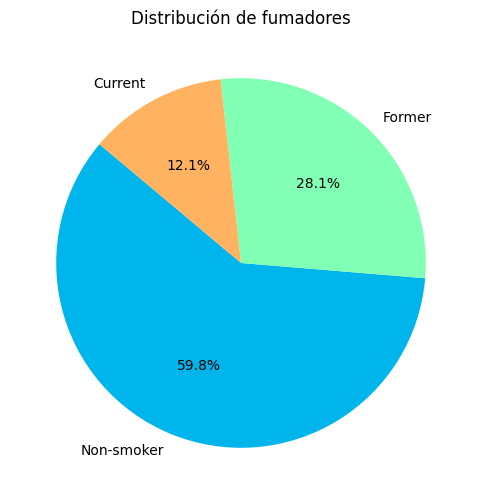

In [ ]:
#Analizo cómo está distribuido el porcentaje de fumadores dentro del dataset
smoking_counts = depresion_df['Smoking Status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow", len(smoking_counts)))

plt.title('Distribución de fumadores')

plt.show()

<ipython-input-96-938a454b3779>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depresion_df, x='Physical Activity Level', y= 'Age',palette="rainbow")


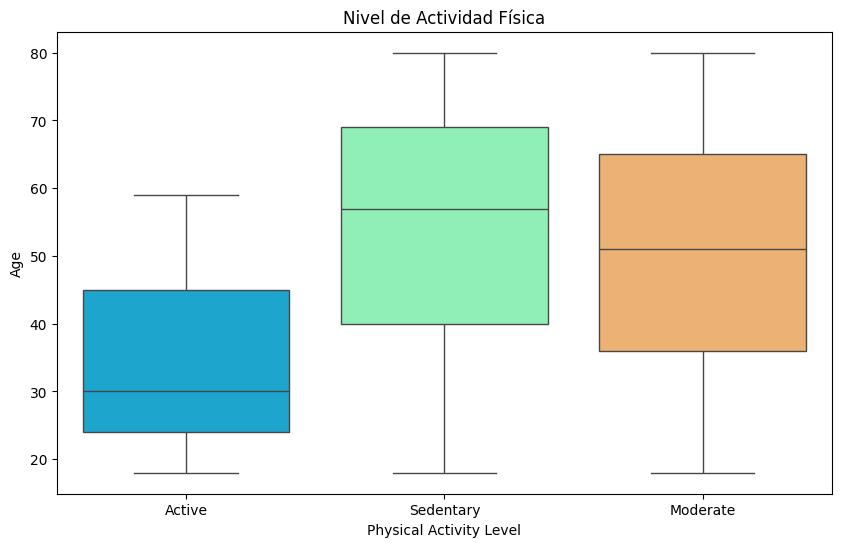

In [ ]:
#Analizo la actividad física realizada en función de la edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=depresion_df, x='Physical Activity Level', y= 'Age',palette="rainbow")
plt.title('Nivel de Actividad Física')
plt.show()

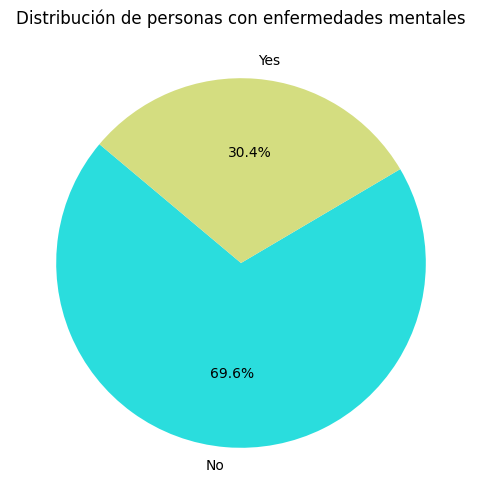

In [ ]:
#Analizo cómo está distribuido el porcentaje de personas con enfermedades mentales dentro del dataset
mental_illness = depresion_df['History of Mental Illness'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mental_illness, labels=mental_illness.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow", len(mental_illness)))

plt.title('Distribución de personas con enfermedades mentales')

plt.show()

**Conclusiones preliminares del análisis univariado**

En función de los análisis univariados realizados, se busca establecer la relevancia de características tales como fumar, el nivel de actividad física realizado y la distribución de la cantidad de personas con enfermedades mentales; para luego, en base a tales resultados, determinar si dichos factores son determinantes.

## Análisis bivariado

<ipython-input-98-614322fb6e8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depresion_df, x='Education Level', y='Income', palette="rainbow")


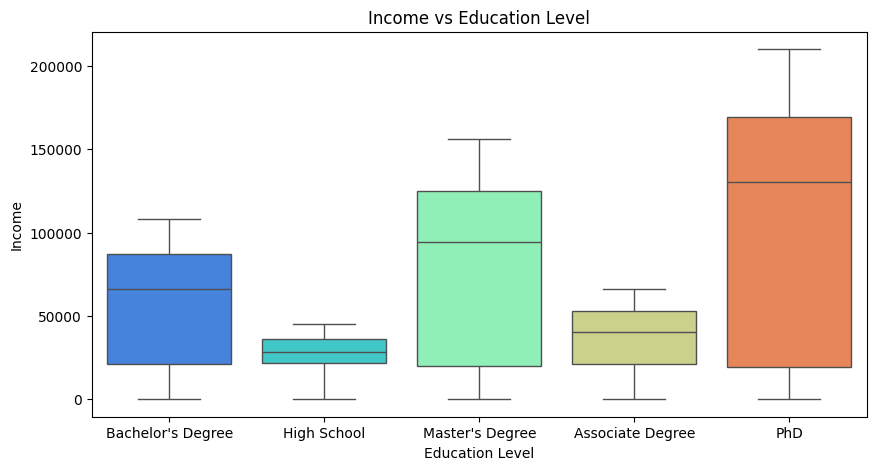

In [ ]:
#Analizo la relación existente entre el nivel educativo y el ingreso obtenido (buscando outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(data=depresion_df, x='Education Level', y='Income', palette="rainbow")
plt.title('Income vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

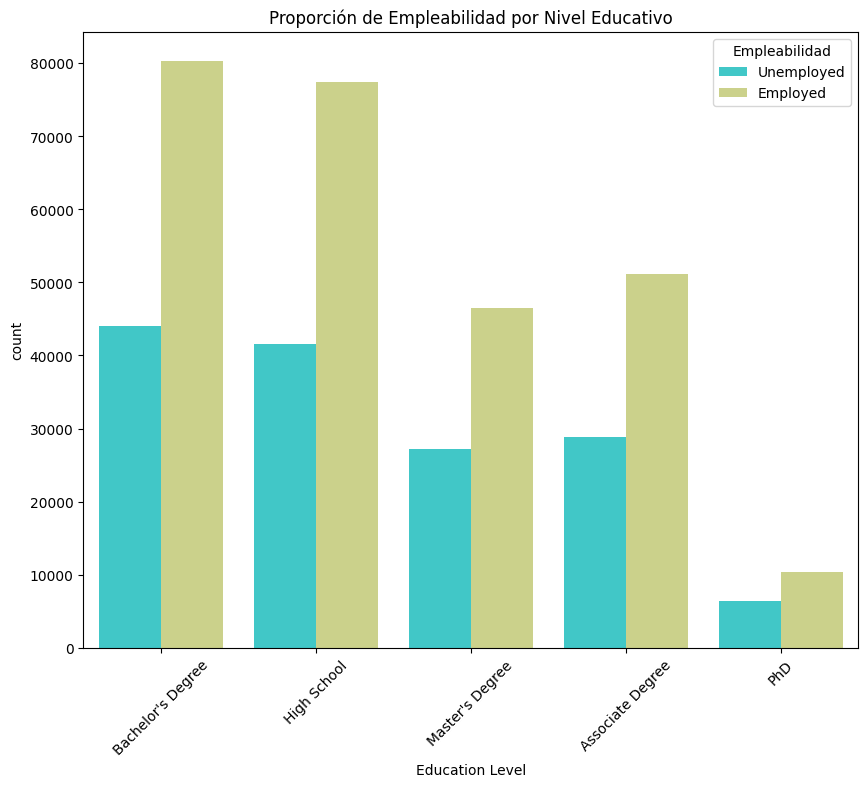

In [ ]:
#Cantidad de empleados/desempleados en función del nivel de estudios
plt.figure(figsize=(10, 8))
sns.countplot(x='Education Level', hue='Employment Status', data=depresion_df, palette="rainbow")
plt.title('Proporción de Empleabilidad por Nivel Educativo')
plt.xticks(rotation=45)
plt.legend(title='Empleabilidad')
plt.show()

**Conclusiones preliminares del análisis bivariado**

Con este análisis se intenta arribar a la conclusión de si el nivel educativo alcanzado es determinante con la empleabilidad en el mundo actual; pudiendo ser relevante en el nivel de estres y posible depresión por no estar empleado.

## **Análisis multivariado**

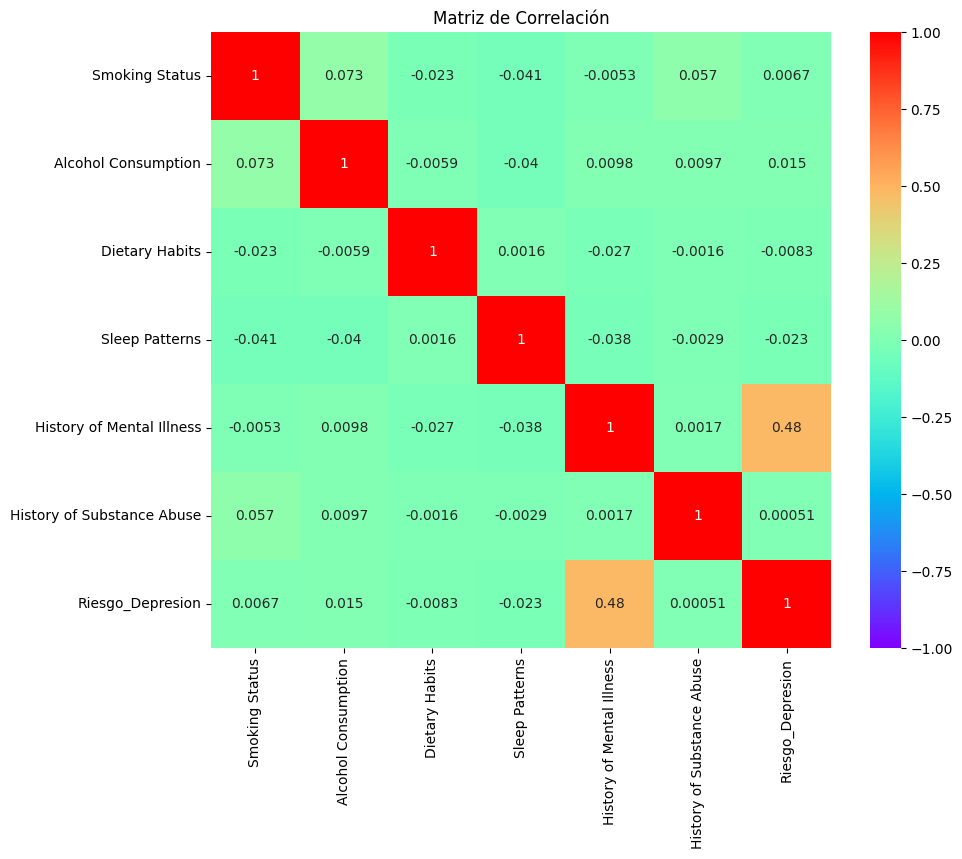

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = depresion_df[['Smoking Status', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse','Riesgo_Depresion']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

**Conclusiones preliminares del análisis multivariado**

Con la matriz de correlación presentada, se intenta representar los factores más determinantes e influyentes en la problemática estudiada.

# **Preprocesamiento de Datos**

Se procede al cambio de variables categóricas por numéricas en cada una de las columnas a ser utilizadas para el análisis. Para ello se utiliza la librería Pandas, importada al inicio del Notebook.

In [ ]:
depresion_df.loc[depresion_df['Smoking Status'] == 'Non-smoker', 'Smoking Status'] = 0
depresion_df.loc[depresion_df['Smoking Status'] == 'Former', 'Smoking Status'] = 1
depresion_df.loc[depresion_df['Smoking Status'] == 'Current', 'Smoking Status'] = 2

In [ ]:
depresion_df.loc[depresion_df['Physical Activity Level'] == 'Sedentary', 'Physical Activity Level'] = 0
depresion_df.loc[depresion_df['Physical Activity Level'] == 'Active', 'Physical Activity Level'] = 1
depresion_df.loc[depresion_df['Physical Activity Level'] == 'Moderate', 'Physical Activity Level'] = 2


In [ ]:
depresion_df.loc[depresion_df['Employment Status'] == 'Employed', 'Employment Status'] = 1
depresion_df.loc[depresion_df['Employment Status'] == 'Unemployed', 'Employment Status'] = 0

In [ ]:
depresion_df.loc[depresion_df['Alcohol Consumption'] == 'Low', 'Alcohol Consumption'] = 0
depresion_df.loc[depresion_df['Alcohol Consumption'] == 'Moderate', 'Alcohol Consumption'] = 1
depresion_df.loc[depresion_df['Alcohol Consumption'] == 'High', 'Alcohol Consumption'] = 2

In [ ]:
depresion_df.loc[depresion_df['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 0
depresion_df.loc[depresion_df['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 1
depresion_df.loc[depresion_df['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 2

In [ ]:
depresion_df.loc[depresion_df['Sleep Patterns'] == 'Poor', 'Sleep Patterns'] = 0
depresion_df.loc[depresion_df['Sleep Patterns'] == 'Fair', 'Sleep Patterns'] = 1
depresion_df.loc[depresion_df['Sleep Patterns'] == 'Good', 'Sleep Patterns'] = 2

In [ ]:
depresion_df.loc[depresion_df['History of Mental Illness'] == 'Yes', 'History of Mental Illness'] = 1
depresion_df.loc[depresion_df['History of Mental Illness'] == 'No', 'History of Mental Illness'] = 0

In [ ]:
depresion_df.loc[depresion_df['History of Substance Abuse'] == 'Yes', 'History of Substance Abuse'] = 1
depresion_df.loc[depresion_df['History of Substance Abuse'] == 'No', 'History of Substance Abuse'] = 0

In [ ]:
depresion_df.loc[depresion_df['Family History of Depression'] == 'Yes', 'Family History of Depression'] = 1
depresion_df.loc[depresion_df['Family History of Depression'] == 'No', 'Family History of Depression'] = 0

In [ ]:
depresion_df.loc[depresion_df['Chronic Medical Conditions'] == 'Yes', 'Chronic Medical Conditions'] = 1
depresion_df.loc[depresion_df['Chronic Medical Conditions'] == 'No', 'Chronic Medical Conditions'] = 0

In [ ]:
depresion_df.head(15)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,0,1,0,26265.67,1,1,1,1,0,1,1
1,Jacqueline Lewis,55,Married,High School,1,0,0,1,42710.36,2,0,1,1,0,0,1
2,Shannon Church,78,Widowed,Master's Degree,1,0,0,1,125332.79,0,0,2,0,0,1,0
3,Charles Jordan,58,Divorced,Master's Degree,3,0,2,0,9992.78,1,1,0,0,0,0,0
4,Michael Rich,18,Single,High School,0,0,0,0,8595.08,0,1,1,1,0,1,1
5,Kathy Hill,20,Single,High School,0,1,1,1,44448.91,0,0,1,0,1,0,0
6,Crystal Delgado,60,Widowed,Associate Degree,1,0,0,0,22565.47,1,1,0,0,1,0,0
7,Charles Kaiser,31,Single,High School,0,0,1,1,39608.18,1,0,2,0,0,0,0
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,0,1,1,93360.07,1,2,2,0,1,0,1
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,0,0,1,77597.84,0,0,0,1,0,0,0


In [ ]:
depresion_df['Total_Riesgo'] = depresion_df[['History of Mental Illness', 'Family History of Depression', 'Chronic Medical Conditions']].sum(axis=1)
depresion_df['Alto_Riesgo_Depresion'] = depresion_df['Total_Riesgo'].apply(lambda x: 1 if x >= 2 else 0)
print(depresion_df['Alto_Riesgo_Depresion'].value_counts())

Alto_Riesgo_Depresion
0    323817
1     89951
Name: count, dtype: int64


# **Feature Selection**

Dado que no poseo una variable objetivo definida en función de los datos obtenidos del dataset, procedo a la creación de una llamada "Riesgo_Depresión" y luego procedo a establecer el riesgo de padecer dicha enfermedad; considerando las características de "Historial de enfermedades mentales", "Historial Familiar de Depresión" y "Chronic Medical Conditions" como las variables dependientes de mayor influencia.

In [ ]:
# Creo la columna de la variable objetivo
depresion_df['Riesgo_Depresion'] = 0

# Defino las condiciones que deben darse para que se asigne el valor "1" en caso de riesgo de depresión
condiciones = (
    (depresion_df['History of Mental Illness'] == 1) |
    (depresion_df['Family History of Depression'] == 1) |
    (depresion_df['Chronic Medical Conditions'] == 1)
)

# Asigno el valor "1" para "Si, posee riesgo"
depresion_df.loc[condiciones, 'Riesgo_Depresion'] = 1

In [ ]:
# Con la variable "Alto_Riesgo_Depresion" busco conocer la cantidad de personas que poseen dicho riesgo, siendo 0 como "No posee" y 1: "Sí posee" en función si la sumatoria de las tres variables es mayor o igual a 2
depresion_df['Total_Riesgo'] = depresion_df[['History of Mental Illness', 'Family History of Depression', 'Chronic Medical Conditions']].sum(axis=1)
depresion_df['Alto_Riesgo_Depresion'] = depresion_df['Total_Riesgo'].apply(lambda x: 1 if x >= 2 else 0)
print(depresion_df['Alto_Riesgo_Depresion'].value_counts())

Alto_Riesgo_Depresion
0    323817
1     89951
Name: count, dtype: int64


In [ ]:
depresion_df.head(15)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Total_Riesgo,Alto_Riesgo_Depresion,Riesgo_Depresion
0,Christine Barker,31,Married,Bachelor's Degree,2,0,1,0,26265.67,1,1,1,1,0,1,1,3,1,1
1,Jacqueline Lewis,55,Married,High School,1,0,0,1,42710.36,2,0,1,1,0,0,1,2,1,1
2,Shannon Church,78,Widowed,Master's Degree,1,0,0,1,125332.79,0,0,2,0,0,1,0,1,0,1
3,Charles Jordan,58,Divorced,Master's Degree,3,0,2,0,9992.78,1,1,0,0,0,0,0,0,0,0
4,Michael Rich,18,Single,High School,0,0,0,0,8595.08,0,1,1,1,0,1,1,3,1,1
5,Kathy Hill,20,Single,High School,0,1,1,1,44448.91,0,0,1,0,1,0,0,0,0,0
6,Crystal Delgado,60,Widowed,Associate Degree,1,0,0,0,22565.47,1,1,0,0,1,0,0,0,0,0
7,Charles Kaiser,31,Single,High School,0,0,1,1,39608.18,1,0,2,0,0,0,0,0,0,0
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,0,1,1,93360.07,1,2,2,0,1,0,1,1,0,1
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,0,0,1,77597.84,0,0,0,1,0,0,0,1,0,1


### Selección de variable objetivo y variables independientes

In [ ]:
X = depresion_df.drop(['Alto_Riesgo_Depresion','Name', 'Marital Status', 'Education Level'], axis=1)
y = depresion_df['Alto_Riesgo_Depresion']

In [ ]:
# Variables independientes
X.columns

Index(['Age', 'Number of Children', 'Smoking Status',
       'Physical Activity Level', 'Employment Status', 'Income',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Total_Riesgo', 'Riesgo_Depresion'],
      dtype='object')

In [ ]:
# Variable dependiente
y.sample(15)

,Alto_Riesgo_Depresion
106716,0
264881,0
206401,0
45166,0
218017,0
71023,0
369926,0
306543,0
62636,0
383123,0
